In [17]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [2]:
file_path = Path("Resources/health_medicare_2022.csv")
df = pd.read_csv(file_path)
df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,County_Name,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,...,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
0,1,1,1001,AL,Autauga,8027.394727,0.201,4.510042,5.419068,0.097382,...,33.58,8366.20,0.91364,498.33,20447.27,0.91945,102.67,9951.78,1.02646,2882.17
1,1,3,1003,AL,Baldwin,8118.358206,0.172,4.168866,5.173915,0.083857,...,101.42,9461.95,0.90255,1709.25,19981.29,0.95975,464.33,10301.61,1.00030,18171.75
2,1,5,1005,AL,Barbour,12876.760319,0.311,5.884415,6.109899,0.119147,...,40.67,11938.99,0.98527,337.58,15417.49,0.91376,194.25,9569.00,0.98952,1461.42
3,1,7,1007,AL,Bibb,11191.474323,0.250,5.161337,5.846096,0.100331,...,18.58,8945.96,0.86691,302.92,15326.91,0.97027,145.83,10055.76,1.08619,941.00
4,1,9,1009,AL,Blount,10787.014541,0.232,4.948393,5.738238,0.078599,...,20.75,9324.11,0.89179,501.75,15045.31,0.89998,190.67,10549.07,1.07827,2837.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,56,37,56037,WY,Sweetwater,8419.275418,0.163,3.495993,3.933550,0.101337,...,28.83,11834.08,0.88365,557.00,19512.86,1.01523,189.42,9113.93,0.89737,3494.50
3171,56,39,56039,WY,Teton,3283.066198,0.116,2.779692,3.305173,0.080655,...,NaN,12832.56,0.77582,70.75,15394.00,0.78165,51.17,8979.45,0.72437,2440.58
3172,56,41,56041,WY,Uinta,9358.208153,0.172,3.792121,4.268578,0.095438,...,14.00,12639.65,0.96239,282.92,21846.03,1.06459,103.42,9638.23,0.88644,1696.25
3173,56,43,56043,WY,Washakie,7073.941804,0.173,3.660729,4.040619,0.067114,...,NaN,11535.96,0.82789,135.17,22593.73,0.89905,99.67,10439.03,0.83596,1249.08


In [3]:
print(*df.columns)

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation County_Name Premature death Poor or fair health Poor physical health days Poor mental health days Low birthweight Adult smoking Adult obesity Food environment index Physical inactivity Access to exercise opportunities Excessive drinking Alcohol-impaired driving deaths Sexually transmitted infections Teen births Uninsured Primary care physicians Dentists Mental health providers Preventable hospital stays Mammography screening Flu vaccinations High school completion Some college Unemployment Children in poverty Income inequality Children in single-parent households Social associations Violent crime Injury deaths Air pollution - particulate matter Drinking water violations Severe housing problems Driving alone to work Long commute - driving alone COVID-19 age-adjusted mortality Life expectancy Premature age-adjusted mortality Child mortality Infant mortality Frequent physical distress Frequent mental distress Diabetes p

In [8]:
charac = ['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'State Abbreviation', 'County_Name',
        'Premature death', 'Poor or fair health', 'Poor physical health days',
       'Poor mental health days', 'Low birthweight', 'Adult smoking',
       'Adult obesity', 'Food environment index', 'Physical inactivity',
       'Access to exercise opportunities', 'Excessive drinking',
       'Alcohol-impaired driving deaths', 'Sexually transmitted infections',
       'Teen births', 'Uninsured', 'Primary care physicians', 'Dentists',
       'Mental health providers', 'Preventable hospital stays',
       'Mammography screening', 'Flu vaccinations', 'High school completion',
       'Some college', 'Unemployment', 'Children in poverty',
       'Income inequality', 'Children in single-parent households',
       'Social associations', 'Violent crime', 'Injury deaths',
       'Air pollution - particulate matter', 'Drinking water violations',
       'Severe housing problems', 'Driving alone to work',
       'Long commute - driving alone', 'COVID-19 age-adjusted mortality',
       'Life expectancy', 'Premature age-adjusted mortality',
       'Child mortality', 'Infant mortality', 'Frequent physical distress',
       'Frequent mental distress', 'Diabetes prevalence', 'HIV prevalence',
       'Food insecurity', 'Limited access to healthy foods',
       'Drug overdose deaths', 'Motor vehicle crash deaths',
       'Insufficient sleep', 'Uninsured adults', 'Uninsured children',
       'Other primary care providers', 'High school graduation',
       'Disconnected youth', 'Reading scores', 'Math scores',
       'School segregation', 'School funding adequacy', 'Gender pay gap',
       'Median household income',
       'Children eligible for free or reduced price lunch',
       'Residential segregation - Black/white',
       'Residential segregation - non-white/white', 'Childcare cost burden',
       'Childcare centers', 'Homicides', 'Suicides', 'Firearm fatalities',
       'Juvenile arrests', 'Traffic volume', 'Homeownership',
       'Severe housing cost burden', 'Broadband access', 'Population',
       '% below 18 years of age', '% 65 and older', '% non-Hispanic Black',
       '% American Indian & Alaska Native', '% Asian',
       '% Native Hawaiian/Other Pacific Islander', '% Hispanic',
       '% non-Hispanic white', '% not proficient in English', '% female',
       '% rural']


In [9]:
print(*zip(df.columns, df[charac].isnull().sum()))

('State FIPS Code', 0) ('County FIPS Code', 0) ('5-digit FIPS Code', 0) ('State Abbreviation', 0) ('County_Name', 0) ('Premature death', 60) ('Poor or fair health', 0) ('Poor physical health days', 0) ('Poor mental health days', 0) ('Low birthweight', 106) ('Adult smoking', 0) ('Adult obesity', 0) ('Food environment index', 33) ('Physical inactivity', 0) ('Access to exercise opportunities', 76) ('Excessive drinking', 0) ('Alcohol-impaired driving deaths', 27) ('Sexually transmitted infections', 118) ('Teen births', 189) ('Uninsured', 1) ('Primary care physicians', 153) ('Dentists', 90) ('Mental health providers', 204) ('Preventable hospital stays', 53) ('Mammography screening', 20) ('Flu vaccinations', 19) ('High school completion', 0) ('Some college', 0) ('Unemployment', 1) ('Children in poverty', 1) ('Income inequality', 6) ('Children in single-parent households', 1) ('Social associations', 0) ('Violent crime', 191) ('Injury deaths', 105) ('Air pollution - particulate matter', 27) ('

In [10]:
df['State Abbreviation'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [16]:
df['5-digit FIPS Code'].count()

3175

<AxesSubplot:title={'center':'Avg_Risk_Score_AGDU'}, xlabel='State Abbreviation'>

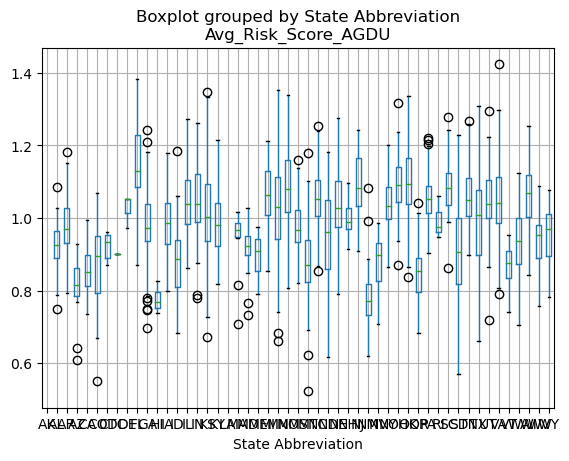

In [18]:
%matplotlib inline
df.boxplot(column="Avg_Risk_Score_AGDU",by="State Abbreviation")